In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Chemin vers le fichier CSV
fichier_csv = 'Stage-3.csv'

# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv(fichier_csv)

# Afficher les 5 premières lignes
print(df)

    Numéro  Position  Pression (Torr)  Ch. Magnétique (T) Gaz
0       33       0.0              0.0                 0.0  N2
1       34       1.4              5.0                 0.0  N2
2       35       2.0              5.0                 0.0  N2
3       36       2.6              5.0                 0.0  N2
4       37       1.4              5.0                 1.5  N2
5       38       2.0              5.0                 1.5  N2
6       39       2.6              5.0                 1.5  N2
7       41       1.4              1.0                 0.0  N2
8       42       2.0              1.0                 0.0  N2
9       43       2.6              1.0                 0.0  N2
10      44       1.4              1.0                 2.0  N2
11      45       2.0              1.0                 2.0  N2
12      46       2.6              1.0                 2.0  N2
13      47       1.4              1.0                 2.0  N2
14      48       2.0              1.0                 2.0  N2
15      

In [3]:
def load_image(file_path):
    # This two lines will let you open a .tif file as a np matrix.
    # The matrix will have a value of "intensity" in each cell, while .tif file usually contains 
    # more data associated to the camera that acquired the image, but I am no expert on this.
    # For the moment, we only care about the intensity color map 
    img = Image.open(file_path)
    img_data = np.array(img)
    return img_data

In [4]:
ligne_num = int(input())
ligne = df.iloc[ligne_num]

position = ligne['Position']
numero = int(ligne['Numéro'])

 12


In [5]:
file_path =  f"../Stage_Pic/C477{numero}.tif"
print(file_path)

# Valeurs données
ti = -26.67  # ns
tf = 73.1    # ns

# Définition des valeurs de xi, xf selon la position
if position == 1.4:
    xi, xf = 0.3, 2.6
elif position == 2:
    xi, xf = 0.9, 3.32
elif position == 2.6:
    xi, xf = 1.5, 3.9
else:
    xi, xf = None, None

# Calcul des pentes
pente_x = (xf - xi) / 1016
pente_t = (tf - ti) / 1344

# Affichage de la pente
#print(f'La pente est : {pente:.3f}')


../Stage_Pic/C47746.tif


nan nan nan


/tmp/ipykernel_2774007/3073160723.py:39: RuntimeWarning: invalid value encountered in power
  return  a * t_values**b + c


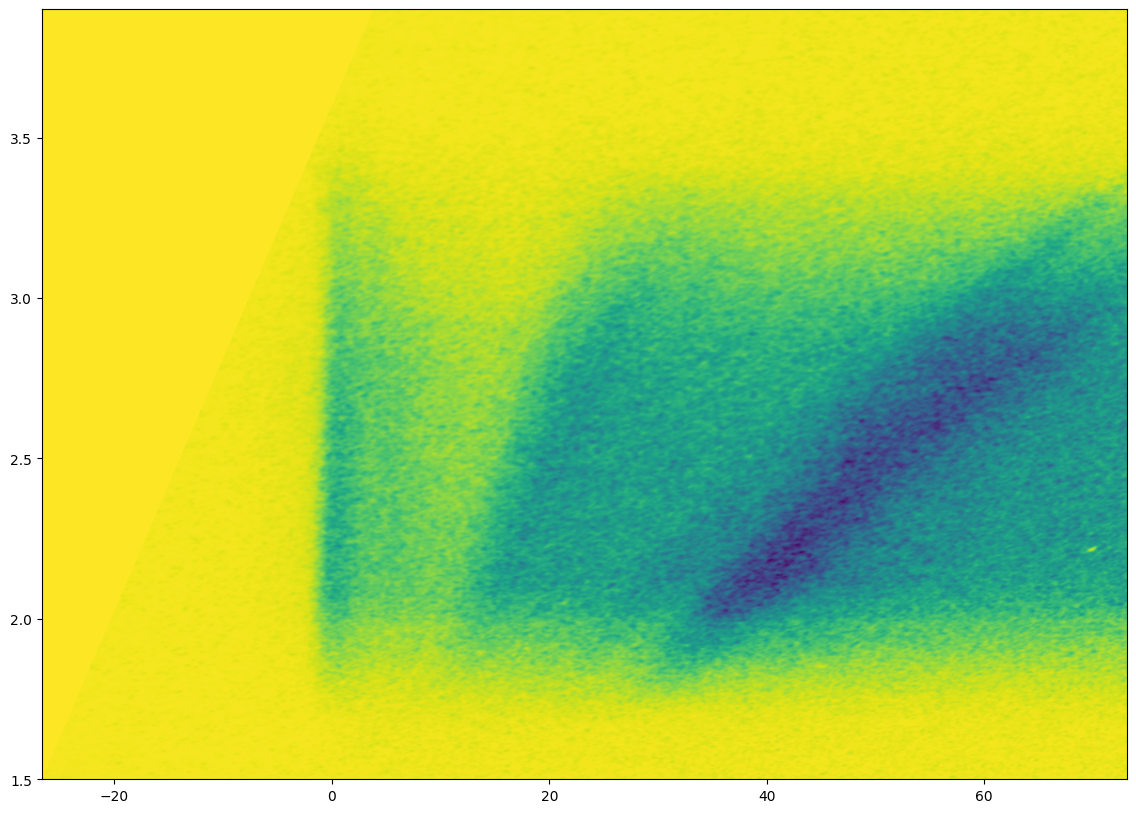

In [12]:
img_data = load_image(file_path)        # Load the image with function as a matrix
img_data = np.flip(img_data, axis =0 )  # Some image will need flipping, some others no.

# Tracer l'image
plt.figure(figsize=(14, 10))
plt.imshow(img_data,                   # Affichage 2D de l'image
           cmap='viridis_r',           # Colormap
           extent=[ti, tf, xi, xf],
           aspect='auto',              # Ratio automatique
           vmax=np.max(img_data)) # Réglage de la luminosité maximale

t = []

# Parcours de chaque ligne (chaque position x)
for j in range(img_data.shape[0]):  # Pour chaque ligne x
    # Trouver la position du pic d'intensité (colonne avec la valeur maximale)
    peak_position = np.argmax(img_data[j, :])  # Trouver la position de l'intensité maximale
    t.append(peak_position)
    
x = np.linspace(0,np.shape(img_data)[0],np.shape(img_data)[0])


b_t = ti - pente_t * 0  # Ordonnée à l'origine pour t (si t = ti pour pixel = 0)
b_x = xi - pente_x * 0  # Ordonnée à l'origine pour x (si x = xi pour pixel = 0)

# Fonction pour passer des pixels en t et x
def pixels_to_t(pix1):
    return pente_t * pix1 + b_t

def pixels_to_x(pix):
    return pente_x * pix + b_x

t_values = pixels_to_t(np.array(t))
x_values = pixels_to_x(x)

# Modèle quadratique
def quadratic_model(t_values, a, b, c):
    return  a * t_values**b + c

# Ajustement des paramètres avec scipy.optimize.curve_fit
params, covariance = curve_fit(quadratic_model, t_values, x_values)

a_fit = params[0]  # Paramètre ajusté
b_fit = params[1]
c_fit = params[2]

print(a_fit, b_fit, c_fit)

# Générer les valeurs ajustées
t_fit = np.linspace(0, 50 ,1344)  
x_fit = quadratic_model(t_values, a_fit, b_fit, c_fit)

plt.plot(t_fit, x_fit, color='r')

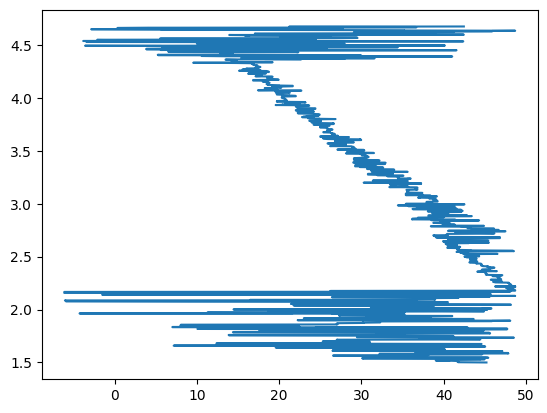

In [13]:
plt.plot(t_values,x_values)